# Dataset

The dataset has been manually curated using [TinEye Multicolr Search](https://labs.tineye.com/multicolr/), a tool that allows users to search for Creative Commons images on Flickr using up to five chosen colors. The dataset contains 16'632 images retrieved using a query based on a combination of 1–3 colors from a fixed color palette. Each image is labeled with the colors used in the query. The color palette is shown below.

<table> 
<tr> 
<td style="background-color:#de323c; color:black; width:100px; height:30px; text-align:center;"><strong>Red</strong></td> 
<td style="background-color:#f18828; color:black; width:100px; height:30px; text-align:center;"><strong>Orange</strong></td> 
<td style="background-color:#f1d41c; color:black; width:100px; height:30px; text-align:center;"><strong>Yellow</strong></td> 
<td style="background-color:#6fb058; color:black; width:100px; height:30px; text-align:center;"><strong>Green</strong></td> 
</tr> 
<tr>
<td style="background-color:#6abbd3; color:black; width:100px; height:30px; text-align:center;"><strong>Cyan</strong></td> 
<td style="background-color:#437eb1; color:black; width:100px; height:30px; text-align:center;"><strong>Blue</strong></td> 
<td style="background-color:#7b5f98; color:black; width:100px; height:30px; text-align:center;"><strong>Violet</strong></td> 
<td style="background-color:#e7a6c1; color:black; width:100px; height:30px; text-align:center;"><strong>Pink</strong></td> 
</tr> 
<tr> 
<td style="background-color:#ffffff; color:black; width:100px; height:30px; text-align:center;"><strong>White</strong></td> <td style="background-color:#888888; color:black; width:100px; height:30px; text-align:center;"><strong>Gray</strong></td> 
<td style="background-color:#222222; width:100px; height:30px; text-align:center;"><strong>Black</strong></td> 
</tr> 
</table>

## Download the images

The dataset is split into three parts due to the size of the images. Download the following files and unzip them into a folder of your choice.
 - [Part 1](dataset/images.zip)
 - [Part 2](dataset/images.z01)
 - [Part 3](dataset/images.z02)

 You can use any unzip tool that supports multi-part archives, such as [7-Zip](https://www.7-zip.org/).

## Load the dataset

Assuming you have unzipped the files into a folder called `.data`, you can load the dataset using the `ImageFolder` class from the TorchVision library. The dataset is organized into subfolders, each containing images of a specific color. The subfolder names are the color names, and the images are in JPEG format.

In [3]:
from torchvision.datasets import ImageFolder

dataset = ImageFolder('.data/images/')

print("Number of images:", len(dataset))
print("Number of classes:", len(dataset.classes))

Number of images: 16632
Number of classes: 231


Let's visualize some of the images.

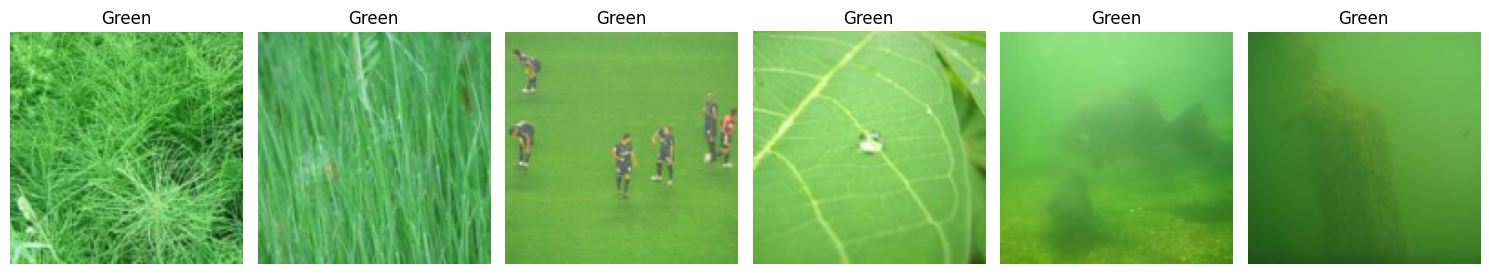

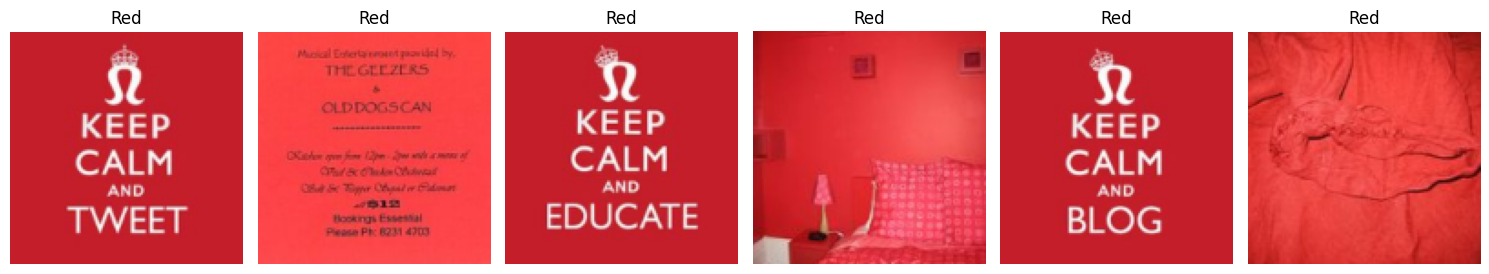

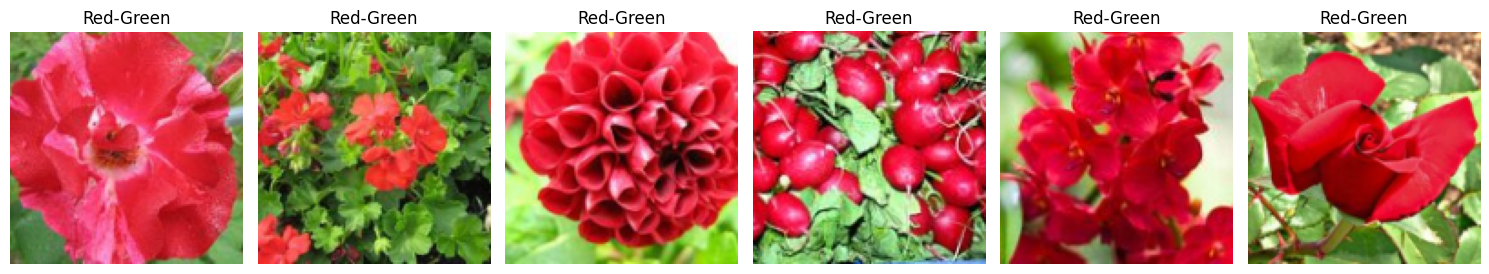

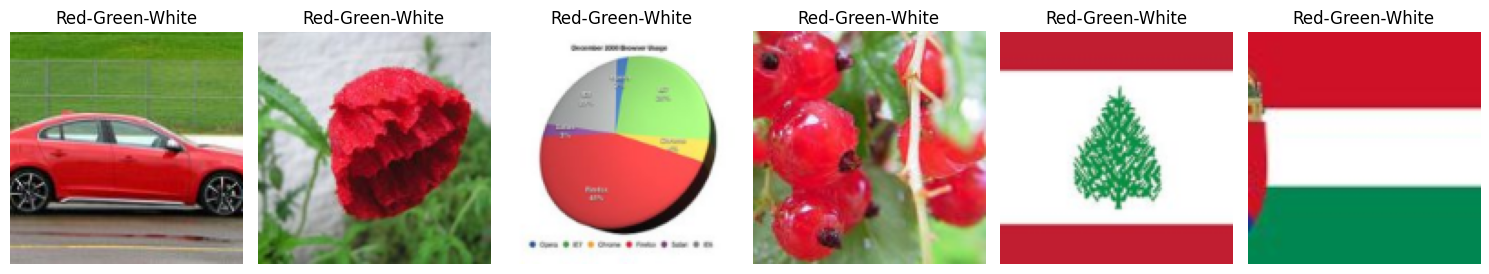

In [29]:
import matplotlib.pyplot as plt
import random
from torchvision.transforms import v2

def visualize_class_samples(dataset, class_name, num_samples=6):
    resize = v2.Compose([
        v2.Resize(128),
        v2.CenterCrop(128)
    ])
    
    # Filter dataset for samples of that class
    class_idx = dataset.classes.index(class_name)
    class_samples = [sample for sample in dataset.samples if sample[1] == class_idx]
    
    if len(class_samples) == 0:
        print(f"No samples found for class '{class_name}'")
        return
    
    random.seed(643)  # For reproducibility
    selected_samples = random.sample(class_samples, min(num_samples, len(class_samples)))
    
    fig, axes = plt.subplots(1, len(selected_samples), figsize=(15, 4))
    
    for i, (path, _) in enumerate(selected_samples):
        image = dataset.loader(path)        
        axes[i].imshow(resize(image))
        axes[i].axis('off')
        axes[i].set_title(class_name, fontsize=12)
    
    plt.tight_layout()
    plt.show()


visualize_class_samples(dataset, 'Green', num_samples=6)
visualize_class_samples(dataset, 'Red', num_samples=6)
visualize_class_samples(dataset, 'Red-Green', num_samples=6)
visualize_class_samples(dataset, 'Red-Green-White', num_samples=6)